In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from src.helper import load_graph_from_json
import pandas as pd

# Appendix 5 Plotting


#### !!!! should this perhaps be in chapter 2? 

Plotting can be very relevant, or not so relevant, depending on the research task at hand. In small networks plotting can create powerful insights. The human mind can very rapidly grasp intuitive properties of a network by just looking at it, without making any calculation. However, it is often the case that large networks plotting leads to "hairballs" where nothing of interesting can be discerned. 

High level plotting skills can -to a large extent- overcome this "hairball" problem, however such techniques are outside the scope of this work. At some point plotting becomes a skill in itself, and gets handed over to specialists, who are possibly not the same persons who are using network analysis to provide insight into the legal research questions. This book respects such division of labor, and thus presentation of plotting will remain basic. THat being said we will introduce *some* simple techniques that can help us tame hairballs somewhat. 

It perhaps should be noted that networkx does not excel as a plotting package. There are better options, and Gephi (discussed on Chapter 6) is more powerful, and takes a different approach altogether (it is not a tool based on coding, but on a graphical user interface). It is alwo work noting that networkx builds its plotting abilities on top of matplotlib, a widely used plotting library for python, that is more geared towards satisfying the needs of scientists than for making beautiful visualizations. Those looking for the latter need to look elsewhere.

Lets start with a small plot that provides immediate insight into the netowkrk. Lets use a classic built in graph, the barbell graph. This looks precisely like the weight lifting instrument that bears the same name. Two heavy weights connected by a metal shaft. Just by visualizing it we can guess which node plays an important brokerage role in the network, such that if removed the network would be disconnected. We can also see that there are two clear communities. The two ends of the barbell. The barbell graph is not too far away from two kite graphs with the tails joined together.

Note that in the function below (the graph constructor) network is allows us to define how many nodes will be present in the "plates" of the barbell, and how many nodes will make up the staff. Here we have made some conservative choices.

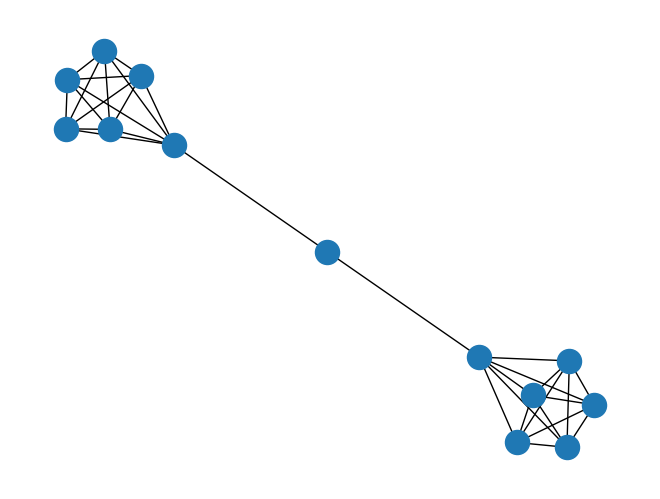

In [10]:
g_barbell = nx.barbell_graph(6, 1)
nx.draw(g_barbell)

Here we have used the ````nx.draw()```` function to "automatically" create a graph for us. This function however is a "default" drawing function and it is fine for viewing simple graphs like this. In order to customize the graph we need to take another more step-by-step approach. Note that this default graph does not provide some information we may want to see (at least in small graphs) like node labels. It is also the case that the "layout" of the nodes is randomized, so every time we draw the barbell, we will get different results. see below:

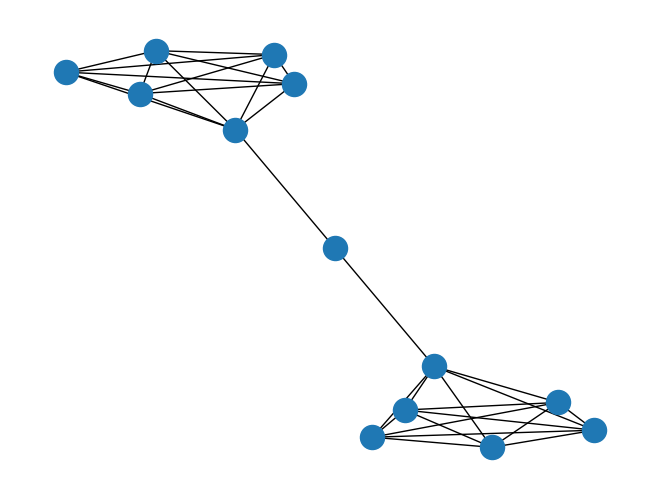

In [11]:
nx.draw(g_barbell)



Before entering into that, lets have a look at the "hairball" phenomenon. Here we are going to look at the consumer protection cases data. As you can see, the default drawing function provides no insight whatsoever.

Now 

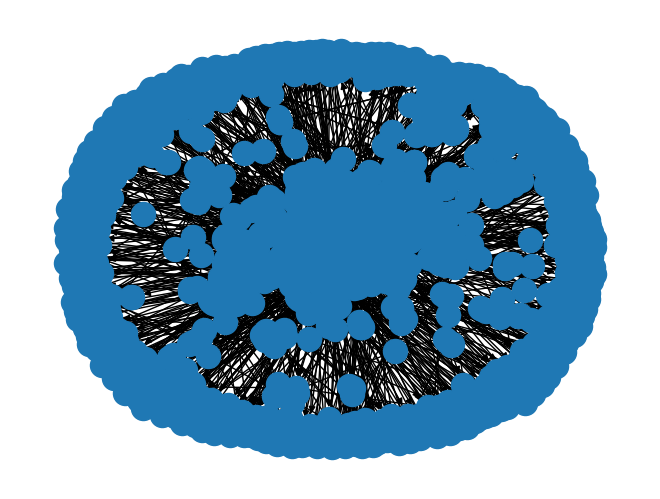

In [12]:
g_consrpot = load_graph_from_json("data/g_consprot.json")
nx.draw(g_consrpot)

The consumer protection database has only 1614 nodes, and while this may be big compared to the kite or the barbell graph we just introduced, it is actually quite small, for the number of cases that modern data-enabled research is bound to consider.

## Custom plotting

To start looking a custom plotting perhaps it is best to start with the ```draw_spring``` function that we have saved in our "helper" library, and which we have used to render some drawing throughout this repository. Here we are going to take the barbell, make it green, and plot it in a smaller window. We will also introduce a local seed to ensure that every time we draw this plot, the shape stays the same (that is, we always get the same random result). Unlike the default plotting function ```draw_spring``` will also provide node labels. Instead of calling the ````draw_spring```` function from our helper library, we will just copy-paste it here, so it is part of this notebook's code. 

In [13]:
def draw_spring(graph, seed=123, node_color="blue", figsize=(8,8)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize))
    pos = nx.spring_layout(graph, seed = seed)
    nx.draw_networkx_nodes(graph, pos=pos, node_color=node_color, ax=ax)
    nx.draw_networkx_edges(graph, pos=pos, ax=ax)
    nx.draw_networkx_labels(graph, pos=pos, ax=ax);



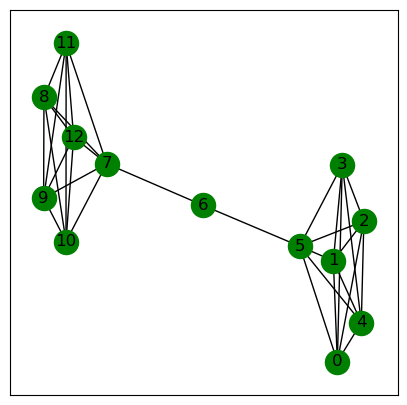

In [14]:
draw_spring(g_barbell, node_color="green", figsize=(5,5))

Having seen the result, lets unpack what the function is doing. Instead of just asking NetworkX to draw the graph all at once, it works in layers. We get to make decision on the layout, on the nodes, the edges and the labels step-by-step, and other layers could be added. By being bundled in a function, these steps happen all at once, here we will unpack them as much as possible (the bare minimum of a working graph will have a layout layer and an edges layer).

#### !!! introduce a ggplot style layers chart here.

In this approach the first thing we need is a "layout", how the graph will arrange the nodes in space. The spring layout is perhaps the most reasonable one for most use cases in networkx, but there are others. Layouts are defined mathematically, in ways that require specialist knowledge. Layouts might borrow concepts from physics and treat nodes and edges as having gravitational attractive or repelling forces. The spring layout (aka Fruchterman-Reingold) gets its name from the fact that edges are modelled as springs with a tendency to pull together, whereas nodes are represented having a repelling force. For our purposes, we just need to see that different layouts may be conductive to different insights. 

The layout is needs to be defined before plotting, and it is customary to save it in a variable called "pos", which is also the keyword that NetworkX drawing functions take for layout. The layout function allows one to put a "seed", a seed is just a number that fixes the random elements of the graph, so that every time you call the graph, you will get the same arrangement.

After defining the spring layout in ````pos```` Here we are just going to draw the nodes, and make them brown in color. 

Because the layout is just an abstract arrangement, to have something that one can see, we need to at least have two layers: layout and nodes, or layout and edges.

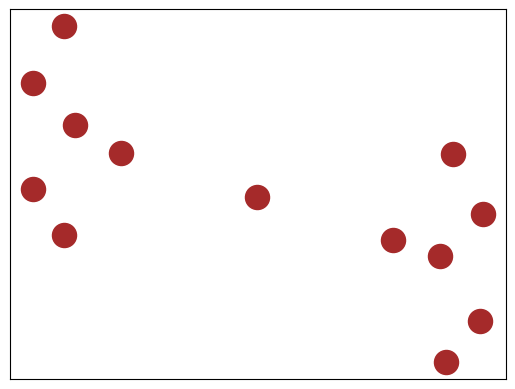

In [15]:
pos = nx.spring_layout(g_barbell, seed=123)
nx.draw_networkx_nodes(g_barbell, pos=pos, node_color="brown")

Now lets add the edges and make them blue in color. Note how this comes in as a third layer.

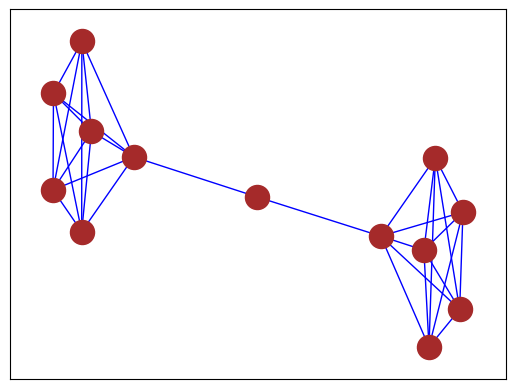

In [16]:
pos = nx.spring_layout(g_barbell, seed=123)
nx.draw_networkx_nodes(g_barbell, pos=pos, node_color="brown")
nx.draw_networkx_edges(g_barbell, pos=pos, edge_color="blue")

These changes have been purely aesthetic, but they show how the layered plotting system works. Now lets change the layout to one that forces the nodes to form a circle and provide the node labels. In this graphs nodes are just labelled as numbers.

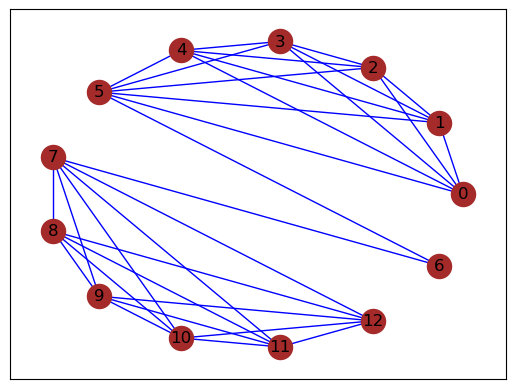

In [17]:
pos = nx.circular_layout(g_barbell)
nx.draw_networkx_nodes(g_barbell, pos=pos, node_color="brown")
nx.draw_networkx_edges(g_barbell, pos=pos, edge_color="blue")
nx.draw_networkx_labels(g_barbell, pos=pos);

We can see that for analytic purposes this was a bad decision. It is no longer transparent that the graph is two communities joined by a lonely node. However we can still to some extent see that node 6 is the one that connects the upper half, and lower half, of the network. 

Other layouts may superimpose some nodes in order to reveal something about the stucture of the network.

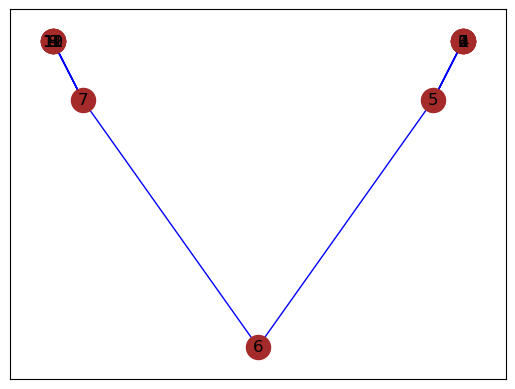

In [21]:
pos = nx.spectral_layout(g_barbell)
nx.draw_networkx_nodes(g_barbell, pos=pos, node_color="brown")
nx.draw_networkx_edges(g_barbell, pos=pos, edge_color="blue")
nx.draw_networkx_labels(g_barbell, pos=pos);

For most purposes layouts like the spring layout or kamada kawai will give reasonable representations of the network. But it is good to know that one can play around with different representations, Some may be more useful than others.

Now, because networkx builds plots in layers, it is possible to give different nodes or edges different treatment, perhaps changing their color, or dropping them out altogether.  For example, here we can node 6, the sole node of the staff part of the barbell stand out by giving it ia different color.  

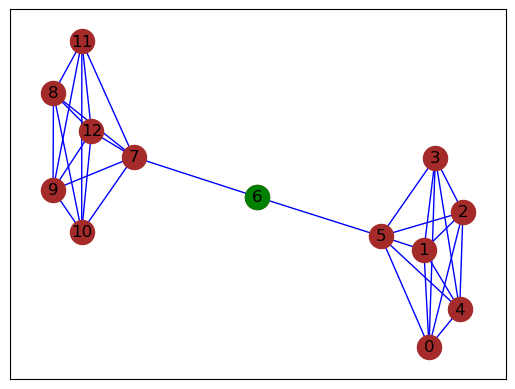

In [22]:
pos = nx.spring_layout(g_barbell, seed=123)
nx.draw_networkx_nodes(g_barbell, pos=pos, node_color="brown")
nx.draw_networkx_nodes(g_barbell, pos=pos, nodelist=[6], node_color="green")
nx.draw_networkx_edges(g_barbell, pos=pos, edge_color="blue")
nx.draw_networkx_labels(g_barbell, pos=pos);


## Taming "hairballs"

There are some strategies that can be used to tame unwieldy networks. The first and most obvious one is to decrease the node size. Another thing that may be beneficial is to introduce transparency to the nodes. This is normally called the "alpha" value in such functions. Here we will reduce the node size to a tenth of the default value (300) and introduce 50% transparency for both the nodes and the arrows. As a result, where nodes overlap, they will have a stronger shade of blue, and where arrows overlap they will be more clearly black in color. 

#### !!! are the arrows pointing in the right direction in consprot?

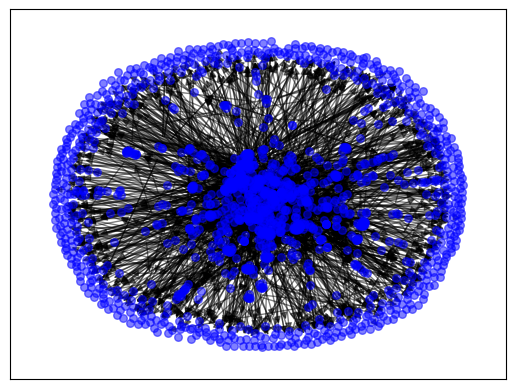

In [29]:
pos = nx.spring_layout(g_consrpot)
nx.draw_networkx_nodes(g_consrpot, pos=pos, node_color="blue", node_size=30, alpha=0.5)
nx.draw_networkx_edges(g_consrpot, pos=pos, edge_color="black", alpha=0.5);

Another possibility is to filter the hairball network into one of more manageable size. Here the strategy is to keep only the top 40 nodes in terms of in-degree. Lets present this step-by-step. 

First we get the top40 nodes in terms of degree.

In [58]:
results = nx.in_degree_centrality(g_consrpot)
results

{'61995CJ0259': 0.0024798512089274642,
 '61981CJ0039': 0.0006199628022318661,
 '61986CJ0031': 0.0006199628022318661,
 '61988CJ0331': 0.0018598884066955983,
 '61995CJ0072': 0.0012399256044637321,
 '62016CJ0111': 0.0006199628022318661,
 '62010CJ0058': 0.0006199628022318661,
 '62011CJ0036': 0.0006199628022318661,
 '62015CJ0282': 0.0,
 '61982CJ0174': 0.0024798512089274642,
 '61994CJ0134': 0.0006199628022318661,
 '62001CJ0192': 0.0012399256044637321,
 '62001CJ0236': 0.0018598884066955983,
 '62007CJ0205': 0.0037197768133911966,
 '62008CJ0333': 0.0006199628022318661,
 '62008CJ0446': 0.0006199628022318661,
 '62015CJ0268': 0.0006199628022318661,
 '62015CJ0177': 0.0,
 '62012CJ0299': 0.0006199628022318661,
 '62013CJ0137': 0.0,
 '62009CJ0266': 0.0006199628022318661,
 '62010CJ0319': 0.0006199628022318661,
 '62012CJ0335': 0.0006199628022318661,
 '62011CJ0636': 0.0,
 '62009CJ0243': 0.0006199628022318661,
 '61999CJ0006': 0.0006199628022318661,
 '62007CJ0375': 0.0012399256044637321,
 '62008CJ0165': 0.0

Now we put these into a dataframe, to take advantage of pandas ```nlargest``` method (using Pandas is not the only way to do this, but perhaps it is the most intuitive).

In [59]:


resdf = pd.DataFrame({"score": results.values()}, index=results.keys())
resdf



,score
61995CJ0259,0.00248
61981CJ0039,0.00062
61986CJ0031,0.00062
61988CJ0331,0.00186
61995CJ0072,0.00124
...,...
62007CO0074,0.00000
62006CO0495,0.00000
62005CO0172,0.00000
62005CO0268,0.00000


We are going to need the node names as a list (we will pass these to the plotting function below) so we save them here.

In [ ]:

largest40 = list(resdf.score.nlargest(40).keys())



We are also going to need the names of the edges between top40 nodes, what the list comprehension below is doing is returning only edges were both of the nodes are in the top 40.

In [66]:
largest40edges = [(x,y) for x,y in g_consrpot.edges if (x in largest40 and y in largest40)]
largest40edges

[('61997CJ0087', '61989CJ0241'),
 ('62003CJ0211', '61982CJ0227'),
 ('61989CJ0241', '61978CJ0120'),
 ('61989CJ0241', '61981CJ0286'),
 ('61989CJ0241', '61984CJ0178'),
 ('61981CJ0286', '61978CJ0120'),
 ('62008CJ0040', '61998CJ0240'),
 ('62008CJ0040', '62005CJ0168'),
 ('62008CJ0040', '62008CJ0040'),
 ('62008CJ0040', '62008CJ0243'),
 ('62010CJ0618', '61998CJ0240'),
 ('62010CJ0618', '62005CJ0168'),
 ('62010CJ0618', '62008CJ0040'),
 ('62010CJ0618', '62008CJ0243'),
 ('62010CJ0618', '62010CO0076'),
 ('62011CJ0415', '62005CJ0168'),
 ('62011CJ0415', '62008CJ0040'),
 ('62011CJ0415', '62008CJ0243'),
 ('62011CJ0415', '62010CJ0472'),
 ('62011CJ0415', '62010CJ0618'),
 ('62011CJ0415', '62010CO0076'),
 ('62012CJ0470', '61998CJ0240'),
 ('62012CJ0470', '62005CJ0168'),
 ('62012CJ0470', '62008CJ0040'),
 ('62012CJ0470', '62008CJ0243'),
 ('62012CJ0470', '62010CJ0472'),
 ('62012CJ0470', '62010CO0076'),
 ('62014CJ0169', '62005CJ0168'),
 ('62014CJ0169', '62008CJ0040'),
 ('62014CJ0169', '62008CJ0317'),
 ('62014CJ

Finally, because the network will be smaller, we might get away with adding some labels. Labels must be introduced as a dictionary mapping node ids to the label names. This can be useful for create shorter, custom labels. In this case we don't want to do this, we want to use the node name as the label; but still we need a dictionary and not a list, so we are going to create a dictionary where every value is identical to its key name, which is a bit of a pointless operation, but allows us to get the data into the form that networkx wants it.

In [83]:
labelsdict = {x : x for x in largest40}
labelsdict

{'61992CJ0091': '61992CJ0091',
 '62003CJ0210': '62003CJ0210',
 '62001CJ0491': '62001CJ0491',
 '61994CJ0178': '61994CJ0178',
 '62008CJ0040': '62008CJ0040',
 '62010CJ0618': '62010CJ0618',
 '62003CJ0402': '62003CJ0402',
 '61984CJ0178': '61984CJ0178',
 '61989CJ0241': '61989CJ0241',
 '62011CJ0415': '62011CJ0415',
 '61982CJ0227': '61982CJ0227',
 '62000CO0345': '62000CO0345',
 '61997CJ0087': '61997CJ0087',
 '61978CJ0120': '61978CJ0120',
 '61998CJ0240': '61998CJ0240',
 '62013CJ0026': '62013CJ0026',
 '62011CJ0092': '62011CJ0092',
 '61999CJ0144': '61999CJ0144',
 '62004CJ0033': '62004CJ0033',
 '62005CJ0168': '62005CJ0168',
 '62008CJ0317': '62008CJ0317',
 '62007CJ0487': '62007CJ0487',
 '61981CJ0286': '61981CJ0286',
 '62012CJ0470': '62012CJ0470',
 '62008CJ0243': '62008CJ0243',
 '62003CJ0336': '62003CJ0336',
 '61981CJ0124': '61981CJ0124',
 '62014CJ0169': '62014CJ0169',
 '62008CJ0540': '62008CJ0540',
 '62007CJ0261': '62007CJ0261',
 '62002CJ0434': '62002CJ0434',
 '61999CJ0478': '61999CJ0478',
 '62003C

Here is the end result. We have also scaled the label font size to 6, and made it a little bit transparent.

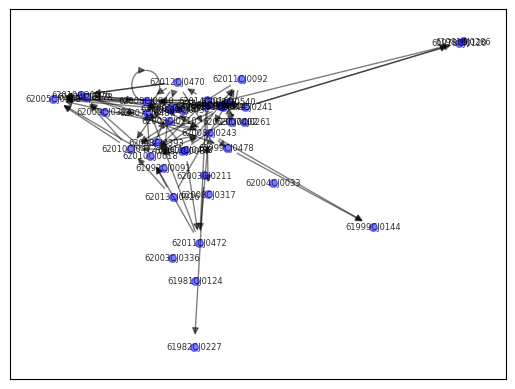

In [82]:
pos = nx.spring_layout(g_consrpot)
nx.draw_networkx_nodes(g_consrpot, pos=pos, nodelist= largest40, node_color="blue", node_size=30, alpha=0.5)
nx.draw_networkx_edges(g_consrpot, pos=pos, edgelist=largest40edges, edge_color="black", alpha=0.5)
nx.draw_networkx_labels(g_consrpot, labels=labelsdict, pos=pos, font_size=6, alpha=0.8);